# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


## Аналитика

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
#Импорт результатов первого запроса
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [ ]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [ ]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [ ]:
#Импорт результатов второго запроса
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [ ]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Вывод:
Так как данные мы получали самостоятельно то ошибок быть не должно)
Из всего есть только разница в числовых тиах данных, но оба варианта не вызовут ошибок.

### Топ-10 городов по количеству рейсов

In [ ]:

top10=query_3.sort_values(by='average_flights', ascending=False).head(10)
top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Вывод:  
Москва как главный хаб внутренних рейсов очевидно на превом месте с большим отрывом, непропорционально населению.  
Далее идет ниспадающее по колличеству населения и иным менее значительным факторам.

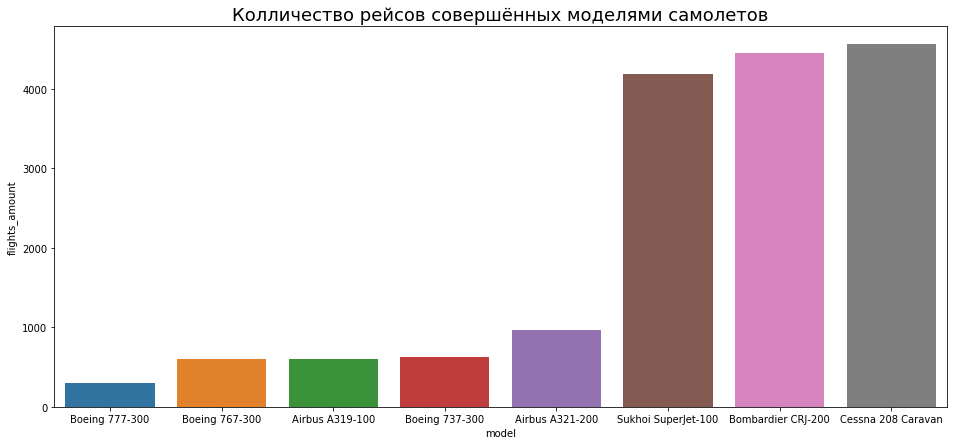

In [ ]:
q = query_1.sort_values(by='flights_amount')
plt.figure(figsize=(16, 7))
plt.title('Колличество рейсов совершённых моделями самолетов', fontsize=18)
sns.barplot(x='model', y='flights_amount', data=q)
plt.show()

Вывод:  
В лидерах самолеты средних размеров для перелетов средней дальности, большие лайнеры используются реже.


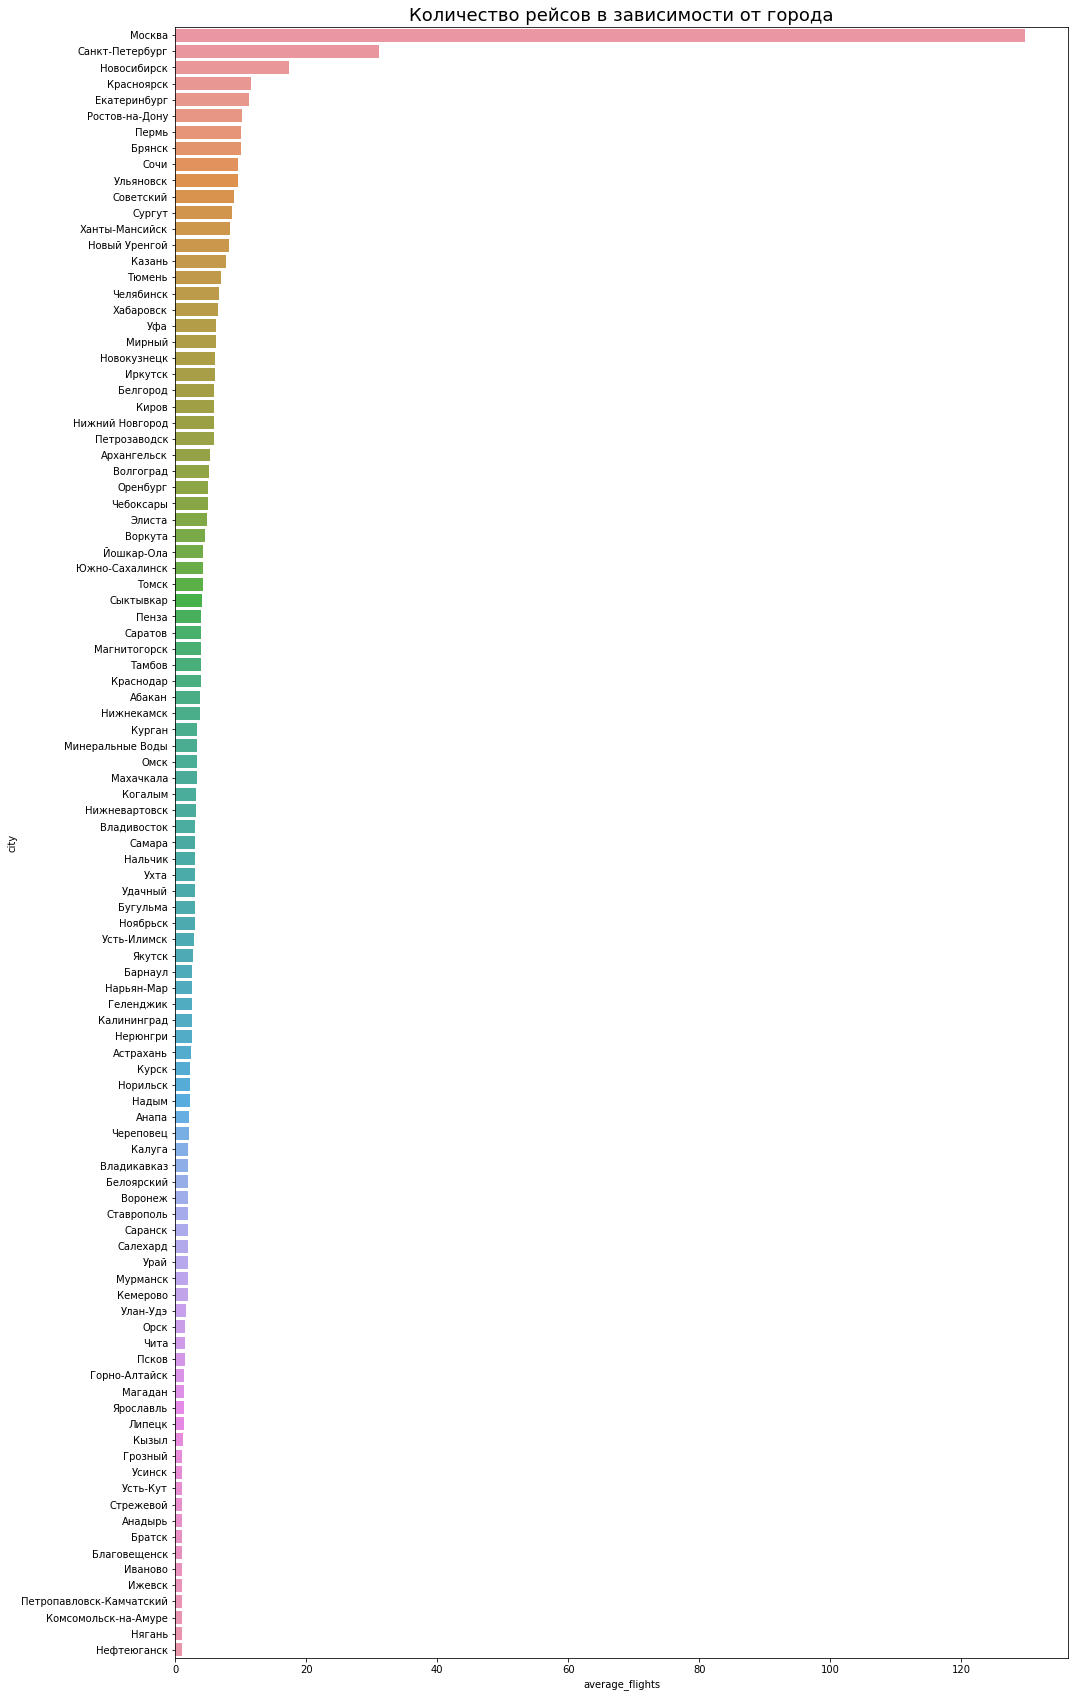

In [ ]:
q = query_3.sort_values(by='average_flights', ascending=False)
plt.figure(figsize=(16, 30))
plt.title('Количество рейсов в зависимости от города', fontsize=18)
sns.barplot(x='average_flights', y='city', data=q)
plt.show()

Вывод:  
Чем больше население тем больше полетов  
Интересно, что Самара хотя и является крупным городом и столицей региона, но осуществляет мало рейсов. Возможно это связано что аэропорт самары находится в 60 км в городе Тольятти, или то, что Самара является главным узлом РЖД и населению удобнее пользоваться поездами.

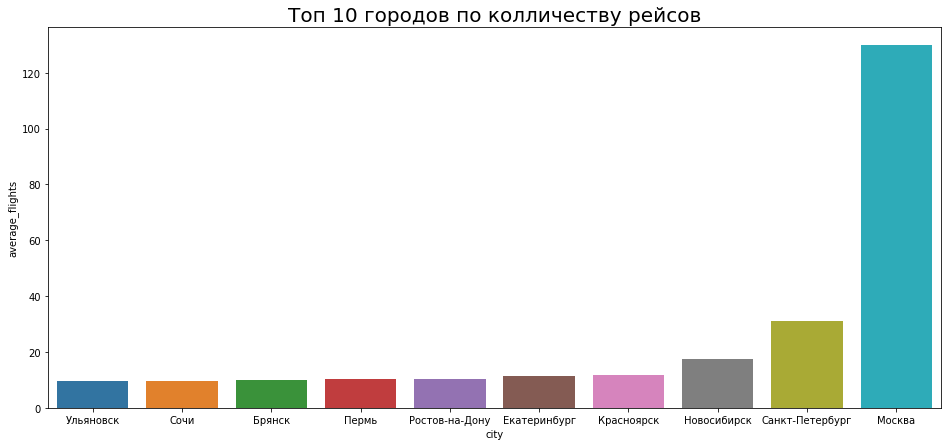

In [ ]:
q=data=top10.sort_values(by='average_flights', ascending=True)
plt.figure(figsize=(16, 7))
plt.title('Топ 10 городов по колличеству рейсов', fontsize=20)
sns.barplot(x='city', y='average_flights', data=q)
plt.show()

Вывод:  
Чем больше населенеие, тем больше полетов.  
Аэропорт в Сочи казалось, должен быть более загруженным.